<a href="https://colab.research.google.com/github/bramvandeurzen934/Group16_ECG/blob/normalisation-and-feature-selection/aantal_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eerst uberhaupt even proberen een file te krijgen.

In [48]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn


# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

In [38]:
# Run this to use from colab environment
!git clone https://github.com/bramvandeurzen934/Group16_ECG.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('/content/Group16_ECG/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Group16_ECG')

data = pd.read_csv('/content/Group16_ECG/ecg_data.csv', index_col=0)
dataframe = pd.DataFrame(data)
print(dataframe)

fatal: destination path 'Group16_ECG' already exists and is not an empty directory.
            0_0         0_1         0_2        0_3        0_4         0_5  \
0     47.685046   48.416904   37.371002  61.604757  58.732738  213.067966   
1    152.726718  297.353726  111.168880  25.419423  14.636085   24.609688   
2      1.601260    3.882169   22.978997  21.673040   8.919484   18.329286   
3      1.388947    3.052483    3.084103   4.627886  10.016196   15.020347   
4      3.625561    3.728466    6.205367  17.722897   5.699401    9.024836   
..          ...         ...         ...        ...        ...         ...   
822   14.673713   13.879148   10.000083   8.337630   3.557302    8.910661   
823    3.167367   13.771749    0.705951   0.349087   9.596407   14.721906   
824    0.439357    8.700374   20.628752  19.379063  23.176646   25.308323   
825    0.235515    4.074581    9.381945   9.621589  16.106126    8.376319   
826    0.301328    2.012000    9.122957   7.332689   7.862709   10.13

In [40]:
# Some functions we will use
def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

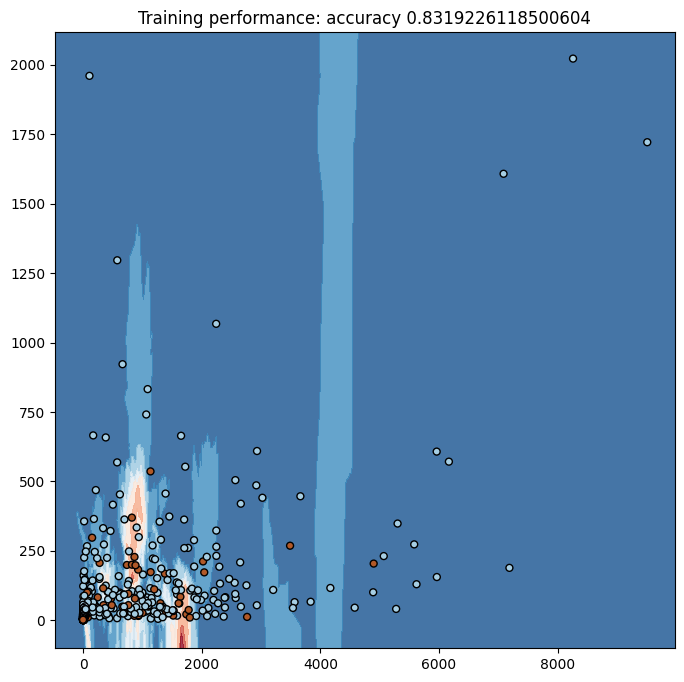

In [62]:
X = np.array(dataframe[['0_0','0_1']])
y = np.array(dataframe['label'])

clf_knn = neighbors.KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X, y)

# Test the classifier on the training data and plot
score_train = clf_knn.score(X, y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(f"Training performance: accuracy {score_train}")
colorplot(clf_knn, ax, X[:, 0], X[:, 1], h=1000)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           s=25, edgecolor='k', cmap=plt.cm.Paired)

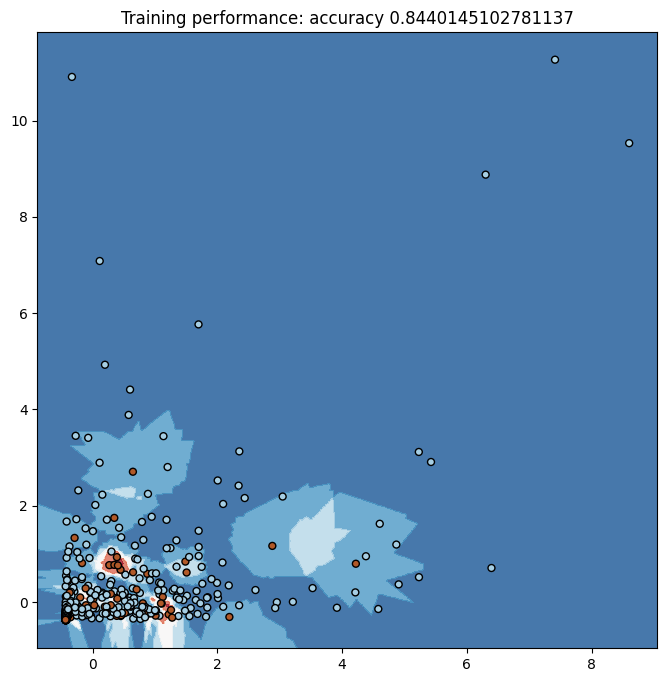

In [63]:
# Scale the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_scaled, y)

# Test the classifier on the training data and plot
score_train = clf_knn.score(X_scaled, y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(f"Training performance: accuracy {score_train}")
colorplot(clf_knn, ax, X_scaled[:, 0],X_scaled[:, 1], h=1000)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='o', c=y,
           s=25, edgecolor='k', cmap=plt.cm.Paired)

Aantal features

In [64]:
X2, y2 = ds.make_classification(n_samples=249, n_features=88, n_informative=5,
                              n_redundant=20, n_repeated=10, n_classes=2,
                              n_clusters_per_class=2, class_sep=0.7, random_state=0)

249
249


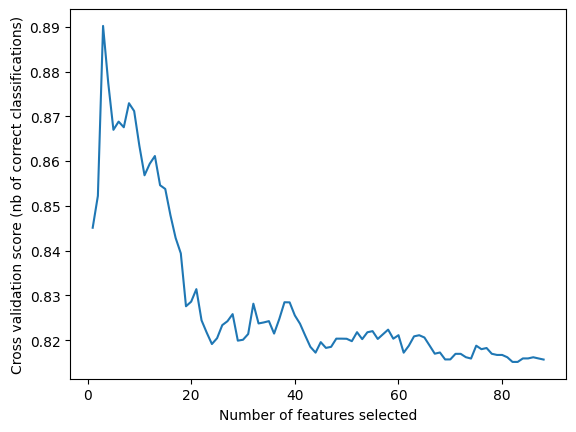

In [65]:
print(len(X2))
print(len(y2))

# Create the RFE object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")

# classifications
rfecv = feature_selection.RFECV(
    estimator=svc, step=1,
    cv=model_selection.StratifiedKFold(4),
    scoring='roc_auc')
rfecv.fit(X2, y2)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()


In [60]:
# classifications
k = feature_selection.SelectKBest(k=10)
print(k)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(k) + 1), k)
plt.show()

SelectKBest()


TypeError: object of type 'SelectKBest' has no len()

PCA

<Axes: >

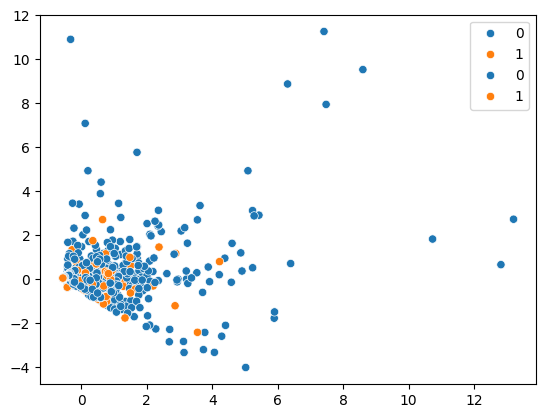

In [67]:
seaborn.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y)
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

seaborn.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)

PCA

PCA